In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
flights=pd.read_csv('ontime_per.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(flights.shape)
print(flights.head())

(445827, 110)
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2016        1      1           6          3  2016-01-06            AA   
1  2016        1      1           7          4  2016-01-07            AA   
2  2016        1      1           8          5  2016-01-08            AA   
3  2016        1      1           9          6  2016-01-09            AA   
4  2016        1      1          10          7  2016-01-10            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N4YBAA      ...               NaN          NaN   
1      19805      AA  N434AA      ...               NaN          NaN   
2      19805      AA  N541AA      ...               NaN          NaN   
3      19805      AA  N489AA      ...               NaN          NaN   
4      19805      AA  N439AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN              

In [3]:
flights = flights[flights['Month'] == 1]
flights.shape


(445827, 110)

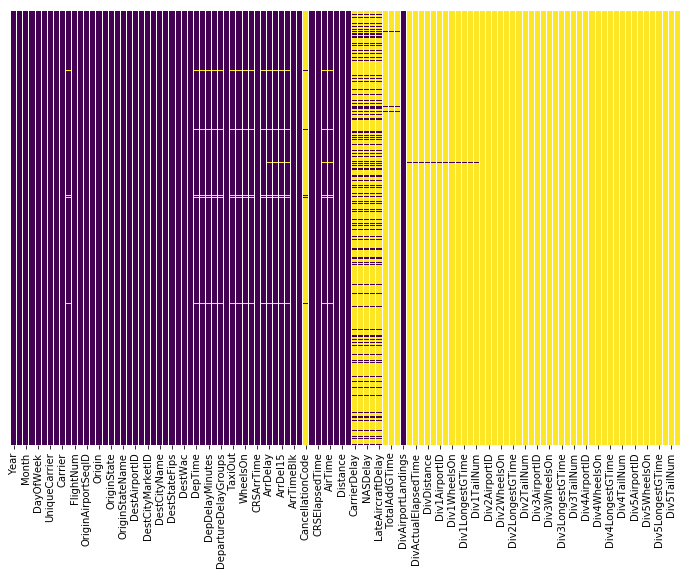

In [5]:
#yellow portion indicates missing values
plt.figure(figsize = (12, 8))
sns.heatmap(flights.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#i am dropping columns columns with 2/3rd of missing data
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [5]:
#columns like year which is constant is dropped
#i,e if no of unique elements is 1,drop those
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [6]:
#i took this code from kaggle which displays filling factor

missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrDelay,12529,97.189717
1,AirTime,12529,97.189717
2,ActualElapsedTime,12529,97.189717
3,ArrDelayMinutes,12529,97.189717
4,ArrDel15,12529,97.189717
5,ArrivalDelayGroups,12529,97.189717
6,TaxiIn,11907,97.329233
7,ArrTime,11907,97.329233
8,WheelsOn,11907,97.329233
9,TaxiOut,11600,97.398094


In [6]:
#because the missing values are <3% drop those rows
flights.dropna(inplace = True)
flights.shape

(433298, 52)

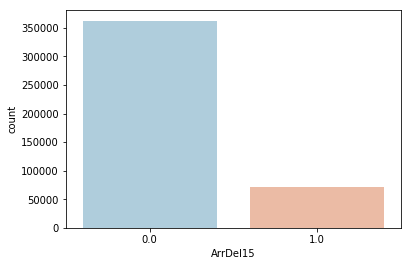

In [10]:
# i think graphs are clear and understandable
sns.countplot(x='ArrDel15',data=flights,palette='RdBu_r')


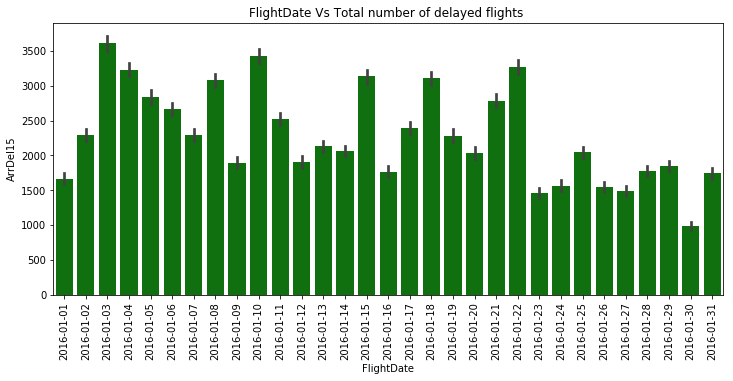

In [16]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDel15', data=flights, color = "green" , order = order , estimator = np.sum)
fig = plt.title("FlightDate Vs Total number of delayed flights ")

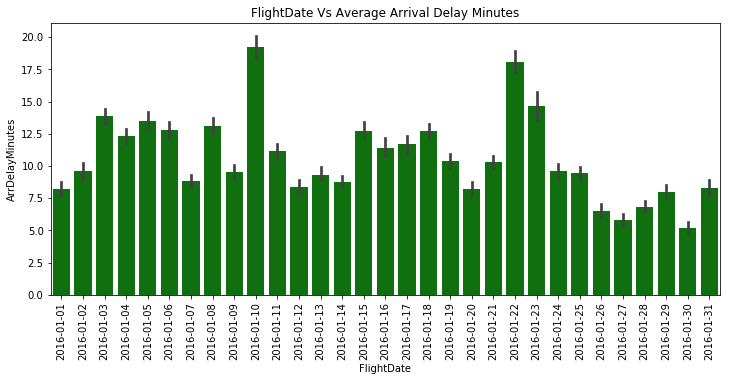

In [17]:
plt.figure(figsize=(12, 5))
order = np.unique(list(flights['FlightDate']))
ax = sns.barplot(x='FlightDate',y ='ArrDelayMinutes', data=flights, color = "green" , order = order , estimator = np.mean)
plt.xticks(rotation=90)
fig = plt.title("FlightDate Vs Average Arrival Delay Minutes")

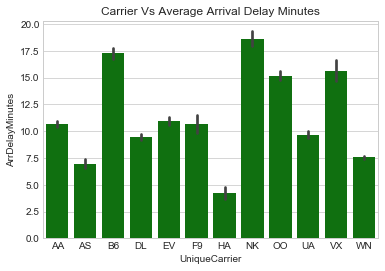

In [18]:
sns.set_style('whitegrid')
carrier_order = np.unique(list(flights['UniqueCarrier']))
sns.barplot(x='UniqueCarrier',y ='ArrDelayMinutes', data=flights, color = "green" , order = carrier_order,estimator=np.mean)
fig = plt.title("Carrier Vs Average Arrival Delay Minutes")

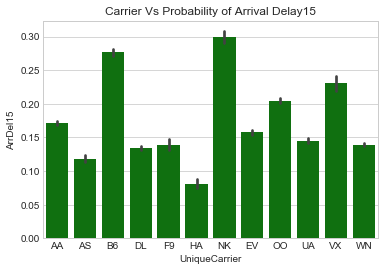

In [19]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Arrival Delay15")

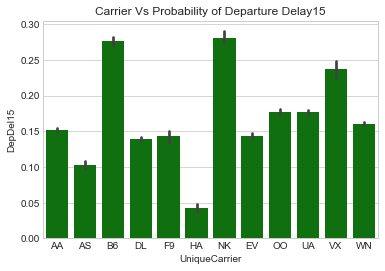

In [20]:
sns.set_style('whitegrid')
sns.barplot(x='UniqueCarrier', y ="DepDel15", data=flights, color ='green')
fig = plt.title("Carrier Vs Probability of Departure Delay15")

In [7]:
#instead of have day number,i have converted it to categorical,for easy understanding
def Impute_month(cols):
    if cols in [1,2,3,4,5,6,7]:
        return "weekI"

    elif cols in [8,9,10,11,12,13,14]:
        return "weekII"

    elif cols in [15,16,17,18,19,20,21]:
        return "weekIII"

    elif cols in [22,23,24,25,26,27,28]:
        return "weekIV"

    else:
        return "weekV"
    
flights['Month'] = flights["DayofMonth"].apply(Impute_month)
flights.drop("DayofMonth", axis = 1, inplace = True)

In [8]:
#same logic as above
def Impute_week(cols):
    if cols in [1,7]:
        return "Weekend"

    else:
        return "Weekdays"
    
    
flights['Week'] = flights["DayOfWeek"].apply(Impute_week)
flights.drop("DayOfWeek", axis = 1, inplace = True)

In [9]:
flights.head()

,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,DivAirportLandings,Month,Week
0,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,155.0,132.0,986.0,4,0,weekI,Weekdays
1,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,150.0,126.0,986.0,4,0,weekI,Weekdays
2,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,170.0,135.0,986.0,4,0,weekII,Weekdays
3,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,151.0,129.0,986.0,4,0,weekII,Weekdays
4,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,...,0.0,0.0,158.0,171.0,137.0,986.0,4,0,weekII,Weekend


In [9]:

#exploring delays in different weeks of month
Month_grouped1 = flights.groupby('Month')["ArrDel15"].sum()
Month_grouped2 = flights.groupby('Month')["ArrDel15"].count()
print(Month_grouped1)
print(Month_grouped2)
Month_grouped = pd.concat([Month_grouped1, Month_grouped2],axis=1, keys=["sum", "count"])
Month_grouped["Average number of delays"] = Month_grouped["sum"]/Month_grouped["count"]
print(Month_grouped)

Month
weekI      18602.0
weekII     17028.0
weekIII    17515.0
weekIV     13160.0
weekV       4577.0
Name: ArrDel15, dtype: float64
Month
weekI      102704
weekII      99710
weekIII     98771
weekIV      91579
weekV       40534
Name: ArrDel15, dtype: int64
             sum   count  Average number of delays
Month                                             
weekI    18602.0  102704                  0.181122
weekII   17028.0   99710                  0.170775
weekIII  17515.0   98771                  0.177329
weekIV   13160.0   91579                  0.143701
weekV     4577.0   40534                  0.112918


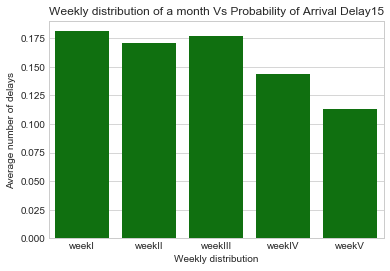

In [25]:
sns.set_style('whitegrid')
sns.barplot(x=Month_grouped.index, y ='Average number of delays', data=Month_grouped, color ='green')
plt.xlabel("Weekly distribution")
plt.ylabel("Average number of delays")
fig = plt.title("Weekly distribution of a month Vs Probability of Arrival Delay15")

In [10]:
#explore delays in weekdays and weekends
week_grouped1 = flights.groupby('Week')["ArrDel15"].sum()
week_grouped2 = flights.groupby('Week')["ArrDel15"].count()
print(week_grouped1)
print(week_grouped2)
week_grouped = pd.concat([week_grouped1, week_grouped2],axis=1, keys=["sum", "count"])
week_grouped["Probability of Arrival Delay15"] = week_grouped["sum"]/week_grouped["count"]
print(week_grouped)

Week
Weekdays    47231.0
Weekend     23651.0
Name: ArrDel15, dtype: float64
Week
Weekdays    306020
Weekend     127278
Name: ArrDel15, dtype: int64
              sum   count  Probability of Arrival Delay15
Week                                                     
Weekdays  47231.0  306020                        0.154340
Weekend   23651.0  127278                        0.185822


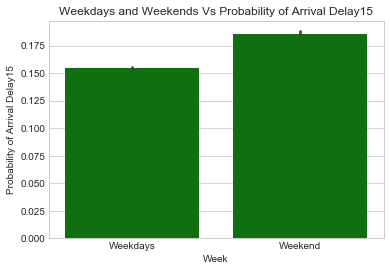

In [27]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Week, y ='ArrDel15', data=flights, color ='green')
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Weekdays and Weekends Vs Probability of Arrival Delay15")

In [11]:
#same logic as above but for orign airport
airport_grouped1 = flights.groupby('Origin')["ArrDel15"].sum()
airport_grouped2 = flights.groupby('Origin')["ArrDel15"].count()
airport_grouped = pd.concat([airport_grouped1, airport_grouped2],axis=1, keys=["sum", "count"])
airport_grouped["Probability of Arrival Delay15"] = airport_grouped["sum"]/airport_grouped["count"]
airport_grouped.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

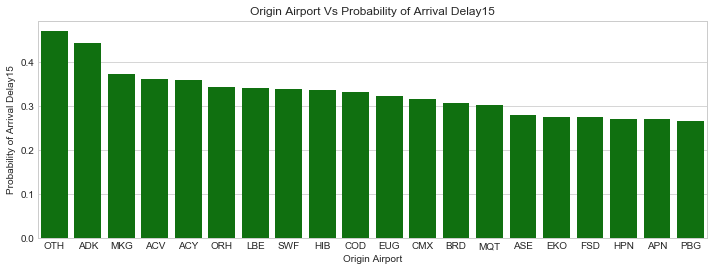

In [29]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped.index[:20], y = "Probability of Arrival Delay15", data=airport_grouped[:20], color ='green')
plt.xlabel("Origin Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Origin Airport Vs Probability of Arrival Delay15")

In [12]:
#for destination airport
airport_grouped3 = flights.groupby('Dest')["ArrDel15"].sum()
airport_grouped4 = flights.groupby('Dest')["ArrDel15"].count()
airport_grouped_dest = pd.concat([airport_grouped3, airport_grouped4],axis=1, keys=["sum", "count"])
airport_grouped_dest["Probability of Arrival Delay15"] = airport_grouped_dest["sum"]/airport_grouped_dest["count"]
airport_grouped_dest.sort_values(by = "Probability of Arrival Delay15", ascending = False, inplace = True)

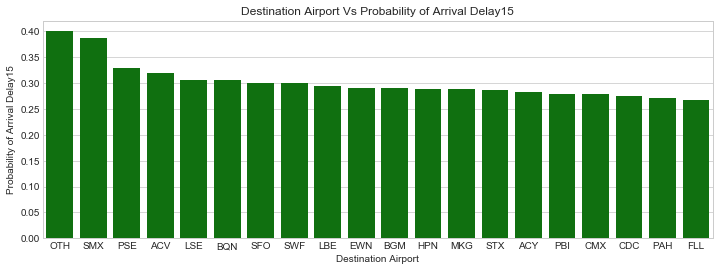

In [31]:
plt.figure(figsize = (12, 4))
sns.set_style('whitegrid')
sns.barplot(x=airport_grouped_dest.index[:20], y ='Probability of Arrival Delay15', data=airport_grouped_dest[:20], color ='green')
plt.xlabel("Destination Airport")
plt.ylabel("Probability of Arrival Delay15")
fig = plt.title("Destination Airport Vs Probability of Arrival Delay15")

In [13]:
#creating new attribute like 'source' to 'dest'
flights["Flight_route"] = flights["Origin"] + " to " + flights["Dest"]
flightroute = flights.groupby('Flight_route').sum()
flightroute.sort_values(by = "ArrDel15", axis = 0, ascending = False, inplace = True)

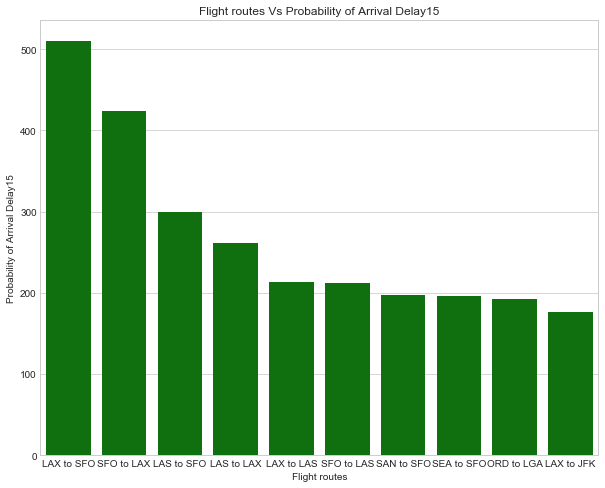

In [33]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
fig = sns.barplot(x=flightroute.index[:10], y = "ArrDel15", data=flightroute[:10], color ='green')
fig.set(xlabel = 'Flight routes', ylabel = 'Probability of Arrival Delay15')
fig = plt.title("Flight routes Vs Probability of Arrival Delay15")

In [14]:
#new attribut for visualization
def impute_time(cols):
    if cols >= 600 and cols < 1200:
        return "Morning"
    elif cols >= 1200 and cols < 1600:
        return "Afternoon"
    else:
        return "Evening"
    
    
flights['Arrival_Time'] = flights["CRSArrTime"].apply(impute_time)
flights.drop("CRSArrTime", axis = 1, inplace = True)

In [15]:
#CRS time is like some computed time ,as we already have arrtime and deptime ,i think we dont need CRS time
flights['Departure_Time'] = flights["CRSDepTime"].apply(impute_time)
flights.drop("CRSDepTime", axis = 1, inplace = True)

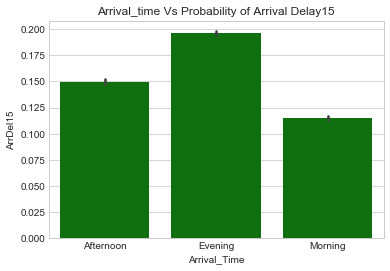

In [36]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Arrival_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

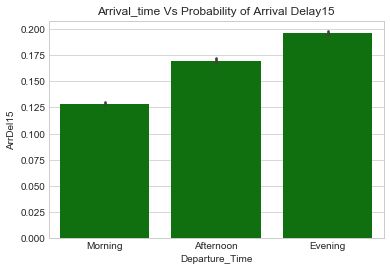

In [37]:
sns.set_style('whitegrid')
sns.barplot(x=flights.Departure_Time, y ="ArrDel15", data=flights, color ='green')
fig = plt.title("Arrival_time Vs Probability of Arrival Delay15")

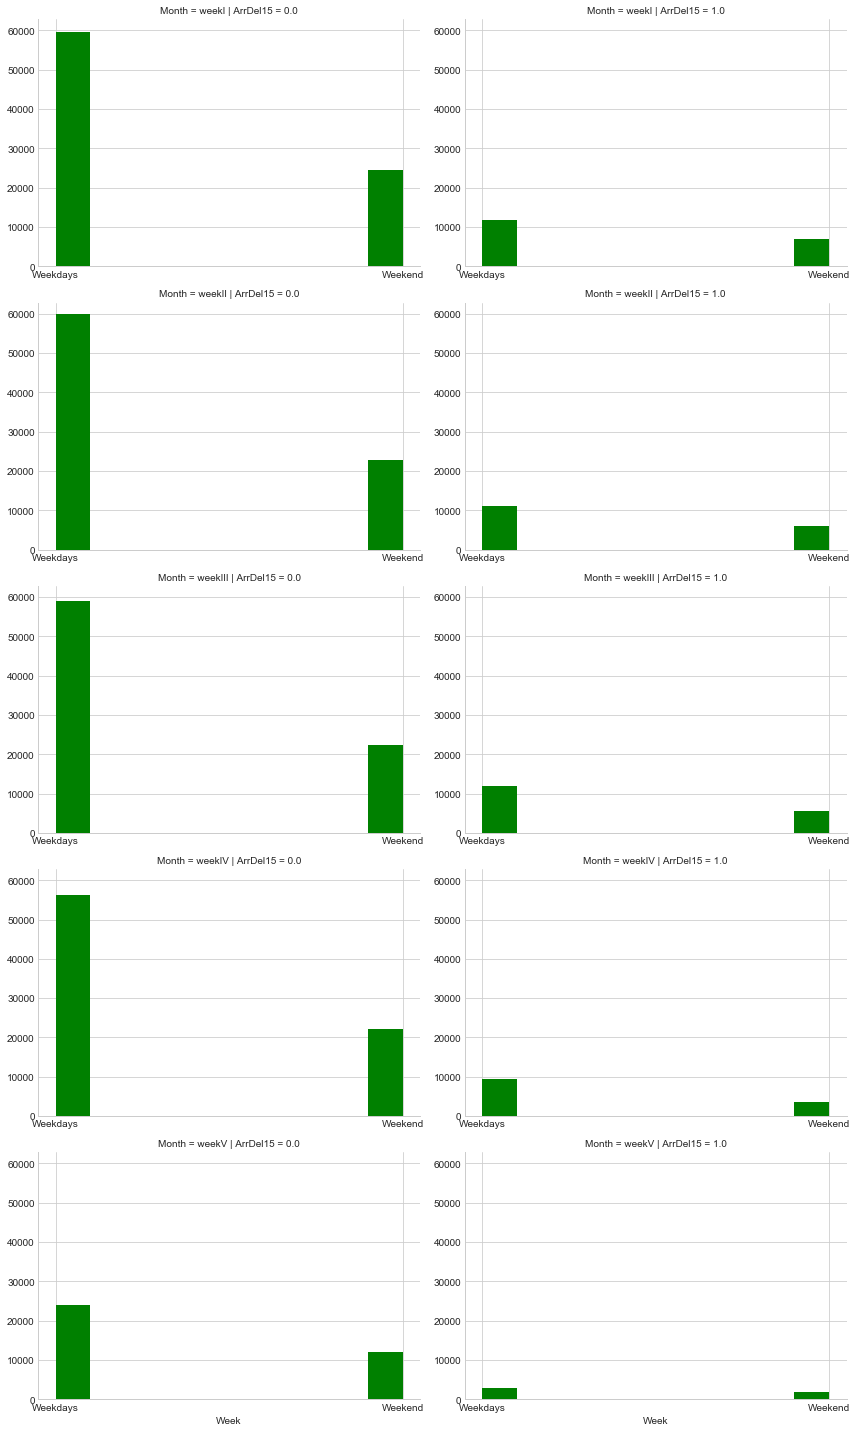

In [38]:
g=sns.FacetGrid(flights,col='ArrDel15',row='Month',size=4,aspect=1.5)
fig=g.map(plt.hist,'Week',color='g')

In [17]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [22]:
#i think these attributs
df_clean_for_delay = flights.drop(['FlightDate', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time'], axis = 1)

In [23]:
print(df_clean_for_delay.shape)
df_clean_for_delay.columns

(433298, 10)


Index(['UniqueCarrier', 'Origin', 'TaxiOut', 'TaxiIn', 'ArrDel15', 'AirTime',
       'Distance', 'Month', 'Week', 'Arrival_Time'],
      dtype='object')

           TaxiOut    TaxiIn  ArrDel15   AirTime  Distance
TaxiOut   1.000000  0.007479  0.273613  0.049890  0.037180
TaxiIn    0.007479  1.000000  0.114644  0.101871  0.096430
ArrDel15  0.273613  0.114644  1.000000  0.031412  0.017494
AirTime   0.049890  0.101871  0.031412  1.000000  0.982208
Distance  0.037180  0.096430  0.017494  0.982208  1.000000


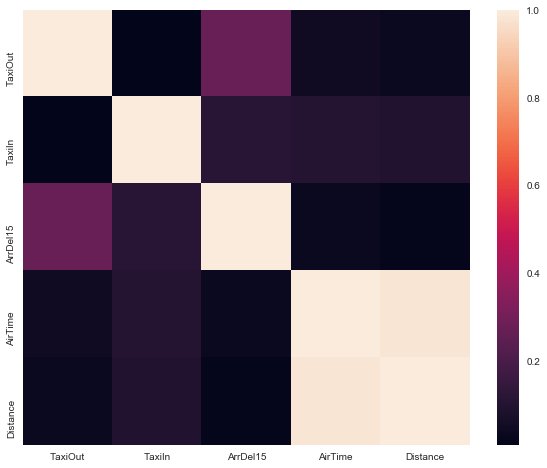

In [37]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [38]:
df_clean_for_delay.drop(["AirTime"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["DepDelayMinutes"], axis = 1, inplace = True)


In [39]:
df_clean_for_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 9 columns):
UniqueCarrier    433298 non-null object
Origin           433298 non-null object
TaxiOut          433298 non-null float64
TaxiIn           433298 non-null float64
ArrDel15         433298 non-null float64
Distance         433298 non-null float64
Month            433298 non-null object
Week             433298 non-null object
Arrival_Time     433298 non-null object
dtypes: float64(4), object(5)
memory usage: 53.1+ MB


In [40]:
#print('flightdate-',len(df_clean_for_delay.FlightDate.unique()))
print('uniquecarrier',len(df_clean_for_delay.UniqueCarrier.unique()))
#print('carrier',len(df_clean_for_delay.Carrier.unique()))
print('origin',len(df_clean_for_delay.Origin.unique()))
print('month',len(df_clean_for_delay.Month.unique()))
print('week',len(df_clean_for_delay.Week.unique()))
#print('flghtroute',len(df_clean_for_delay.Flight_route.unique()))
print('arrivaltime',len(df_clean_for_delay.Arrival_Time.unique()))

uniquecarrier 12
origin 294
month 5
week 2
arrivaltime 3


In [41]:
#print(df_clean_for_delay['Flight_route'].value_counts().sort_values(ascending=False).head(10))


In [42]:
#df_clean_for_delay.drop(["Flight_route"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["FlightDate"], axis = 1, inplace = True)
#df_clean_for_delay.drop(["Origin"], axis = 1, inplace = True)


In [43]:
df_clean_for_delay.shape

(433298, 9)

In [44]:
indicator_var = pd.DataFrame()
categories = ['UniqueCarrier', 'Origin', 'Month', 'Week', 'Arrival_Time']

In [45]:
for i in categories:
    x = pd.get_dummies(df_clean_for_delay[i],drop_first=True)
    indicator_var = pd.concat([indicator_var, x],axis=1)

In [46]:
df_clean_for_delay.drop(['UniqueCarrier', 'Origin','Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)


In [47]:
final_data_delay = pd.concat([indicator_var, df_clean_for_delay],axis=1)


In [48]:
final_data_delay.shape

(433298, 315)

In [49]:
final_data_delay.columns

Index(['AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'NK', 'OO', 'UA', 'VX',
       ...
       'weekIII', 'weekIV', 'weekV', 'Weekend', 'Evening', 'Morning',
       'TaxiOut', 'TaxiIn', 'ArrDel15', 'Distance'],
      dtype='object', length=315)

In [50]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#final_data_delay=poly.fit_transform(final_data_delay)
#final_data_delay.shape

In [51]:
#from sklearn import decomposition
#from sklearn.decomposition import PCA
#pca = PCA(n_components=50)
#final_delay_pca = pd.DataFrame(pca.fit_transform(final_data_delay))

In [52]:
#print(final_delay_pca)
#print(final_delay_pca.head())
#pca.explained_variance_ratio_.sum()

In [53]:
features = []
for i in final_data_delay.columns:
    if i != "ArrDel15":
        features.append(i)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [55]:
X=final_data_delay[features]
y=final_data_delay['ArrDel15']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)



In [57]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)


In [58]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)



0.77623663358719897

In [59]:

dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)
dtc.fit(X_train, y_train)
metrics.accuracy_score(y_test, y_pred_class)


0.77623663358719897

In [60]:

from sklearn.grid_search import GridSearchCV
#sample_split_range = list(range(1, 50))
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


C:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [61]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8519887375209358
{'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [62]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [63]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8516623366347079
{'criterion': 'entropy', 'max_depth': 9}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred_class = dtc.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)



0.79213016385875834

In [66]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [67]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8455728170704366
{'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [68]:
signi_features = list(zip(features, rfc.feature_importances_))


In [74]:
signi_features = pd.DataFrame(signi_features, columns = ["features", "importance"])
signi_features.sort_values(["importance"], ascending = False, inplace = True)
signi_features[:30]

,features,importance
311,TaxiOut,0.289701
313,Distance,0.218918
312,TaxiIn,0.198362
308,Weekend,0.021895
305,weekIII,0.015201
304,weekII,0.015148
309,Evening,0.012382
306,weekIV,0.011060
310,Morning,0.007953
1,B6,0.006851


In [87]:
features1=['TaxiOut','Distance','TaxiIn']
X1=final_data_delay[features1]
y1=final_data_delay['ArrDel15']

In [88]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.70, random_state=0)



In [89]:
dtc1 = DecisionTreeClassifier(random_state=0)
dtc1.fit(X1_train, y1_train)
y1_pred_class = dtc1.predict(X1_test)
metrics.accuracy_score(y1_test, y1_pred_class)


0.80673128702207864

In [90]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [91]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.850208369050602
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [92]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [93]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8503765149616891
{'criterion': 'entropy', 'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [94]:
rfc1 = RandomForestClassifier(random_state=0)
rfc1.fit(X1_train, y1_train)
y_pred_class1 = rfc1.predict(X1_test)
metrics.accuracy_score(y1_test, y_pred_class1)

0.81028540656973613

In [95]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc1, param_grid, cv=10, scoring='accuracy')
grid.fit(X1_train, y1_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [96]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8507358856344046
{'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [97]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=12)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [99]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_selected, y_train)
y_pred_class = dtc.predict(X_test_selected)
metrics.accuracy_score(y_test, y_pred_class)


0.84180321563197169

In [100]:
dtc = DecisionTreeClassifier(min_samples_split=4, random_state=0)
dtc.fit(X_train_selected, y_train)
metrics.accuracy_score(y_test, y_pred_class)

0.84180321563197169

In [101]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [102]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8512403233676659
{'max_depth': 7}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [103]:
param_grid = {"criterion": ['entropy'],  "max_depth": list(range(1,10,1))}
grid = GridSearchCV(dtc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [104]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8513392327271289
{'criterion': 'entropy', 'max_depth': 7}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')


In [105]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_selected, y_train)
y_pred_class = dtc.predict(X_test_selected)
metrics.accuracy_score(y_test, y_pred_class)

0.84208016001230868

In [106]:
param_grid = {"max_depth": list(range(1,10,1))}
grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_selected, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [107]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8516755245493031
{'max_depth': 9}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


In [39]:
         ################Arrdelmin prediction####################

In [55]:
flights.columns

Index(['FlightDate', 'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum',
       'FlightNum', 'OriginAirportID', 'OriginAirportSeqID',
       'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTime',
       'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups',
       'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime',
       'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups',
       'ArrTimeBlk', 'Cancelled', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup',
       'DivAirportLandings', 'Month', 'Week', 'Flight_route', 'Arrival_Time',
       'Departure_Time'],
      dtype='object')

In [56]:
df_clean_for_delay1 = flights.drop(['FlightDate', 'Carrier', 'TailNum', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings', 'Flight_route', 'Departure_Time','Origin','UniqueCarrier'], axis = 1)

In [57]:
df_clean_for_delay1.columns

Index(['AirlineID', 'FlightNum', 'OriginAirportID', 'TaxiOut', 'TaxiIn',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'AirTime', 'Distance',
       'Month', 'Week', 'Arrival_Time'],
      dtype='object')

                 AirlineID  FlightNum  OriginAirportID   TaxiOut    TaxiIn  \
AirlineID         1.000000   0.326941         0.000860  0.179297  0.065527   
FlightNum         0.326941   1.000000        -0.012578  0.118542 -0.035441   
OriginAirportID   0.000860  -0.012578         1.000000 -0.033445  0.042621   
TaxiOut           0.179297   0.118542        -0.033445  1.000000  0.007479   
TaxiIn            0.065527  -0.035441         0.042621  0.007479  1.000000   
ArrTime          -0.021931  -0.011565        -0.002146 -0.032013 -0.001972   
ArrDelayMinutes   0.070629   0.030255         0.017996  0.191672  0.073490   
ArrDel15          0.073137   0.020186         0.026188  0.273613  0.114644   
AirTime           0.006115  -0.308296         0.056410  0.049890  0.101871   
Distance         -0.003466  -0.316598         0.079787  0.037180  0.096430   

                  ArrTime  ArrDelayMinutes  ArrDel15   AirTime  Distance  
AirlineID       -0.021931         0.070629  0.073137  0.006115 -0.

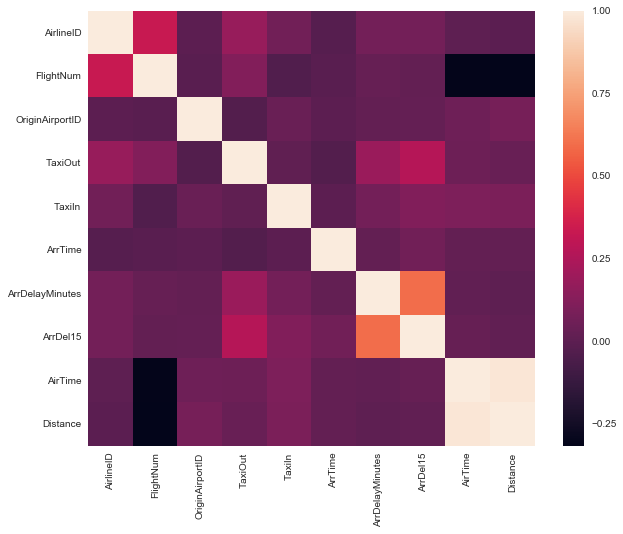

In [58]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay1.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [59]:
df_clean_for_delay1.drop(["AirTime"], axis = 1, inplace = True)


In [60]:
df_clean_for_delay1.drop(["ArrDel15"], axis = 1, inplace = True)

df_clean_for_delay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 11 columns):
AirlineID          433298 non-null int64
FlightNum          433298 non-null int64
OriginAirportID    433298 non-null int64
TaxiOut            433298 non-null float64
TaxiIn             433298 non-null float64
ArrTime            433298 non-null float64
ArrDelayMinutes    433298 non-null float64
Distance           433298 non-null float64
Month              433298 non-null object
Week               433298 non-null object
Arrival_Time       433298 non-null object
dtypes: float64(5), int64(3), object(3)
memory usage: 59.7+ MB


In [61]:
#print('uniquecarrier',len(df_clean_for_delay1.UniqueCarrier.unique()))
#print('origin',len(df_clean_for_delay1.Origin.unique()))
print('Month',len(df_clean_for_delay1.Month.unique()))
print('week',len(df_clean_for_delay1.Week.unique()))
print('Arrival_Time',len(df_clean_for_delay1.Arrival_Time.unique()))


Month 5
week 2
Arrival_Time 3


In [62]:
#df_clean_for_delay1.drop(['Origin'], axis = 1, inplace = True)


In [63]:
#df_clean_for_delay1.drop(['UniqueCarrier','Month','Week','Arrival_Time'], axis = 1, inplace = True)

indicator_var1 = pd.DataFrame()
categories = ['Month','Week','Arrival_Time']

In [64]:
for i in categories:
    x = pd.get_dummies(df_clean_for_delay1[i],drop_first=True)
    indicator_var1 = pd.concat([indicator_var1, x],axis=1)

In [65]:
df_clean_for_delay1.drop(['Month', 'Week', "Arrival_Time"], axis = 1, inplace = True)


In [66]:
final_data_delay1 = pd.concat([indicator_var1, df_clean_for_delay1],axis=1)


In [67]:
final_data_delay1.shape


(433298, 15)

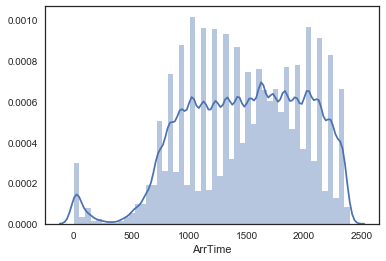

In [68]:
sns.distplot(final_data_delay1.ArrTime)

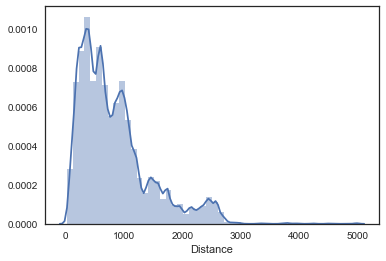

In [69]:
sns.distplot(final_data_delay1.Distance)

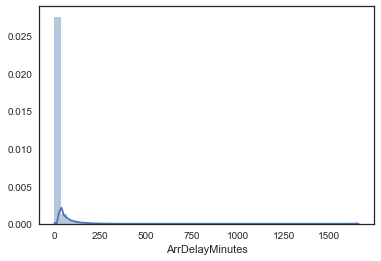

In [70]:
sns.distplot(final_data_delay1.ArrDelayMinutes)

In [71]:
#df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example 
#final_data_delay1[np.abs(final_data_delay1.Distance-final_data_delay1.Distance.mean())<=(3*final_data_delay1.Distance.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
#final_data_delay1=final_data_delay1[~(np.abs(final_data_delay1.Distance-final_data_delay1.Distance.mean())>(3*final_data_delay1.Distance.std()))] 

In [72]:
final_data_delay1.shape

(433298, 15)

In [73]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [74]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=10)
#X_pca = pd.DataFrame(pca.fit_transform(final_data_delay1[features]))
features

['weekII',
 'weekIII',
 'weekIV',
 'weekV',
 'Weekend',
 'Evening',
 'Morning',
 'AirlineID',
 'FlightNum',
 'OriginAirportID',
 'TaxiOut',
 'TaxiIn',
 'ArrTime',
 'Distance']

In [75]:
X=final_data_delay1[features]
y=final_data_delay1['ArrDelayMinutes']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)



In [77]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [79]:
vif.round(1)


,VIF Factor,features
0,2.0,weekII
1,2.0,weekIII
2,1.9,weekIV
3,1.4,weekV
4,1.4,Weekend
5,3.9,Evening
6,2.5,Morning
7,99.9,AirlineID
8,2.8,FlightNum
9,68.8,OriginAirportID


In [80]:
final_data_delay1.drop(['AirlineID'], axis = 1, inplace = True)


In [81]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [82]:
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, random_state=0)


In [83]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)


,VIF Factor,features
0,1.9,weekII
1,1.9,weekIII
2,1.9,weekIV
3,1.4,weekV
4,1.4,Weekend
5,3.9,Evening
6,2.3,Morning
7,2.7,FlightNum
8,22.4,OriginAirportID
9,4.2,TaxiOut


In [84]:
final_data_delay1.drop(['OriginAirportID'], axis = 1, inplace = True)


In [85]:
features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)

In [86]:
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, random_state=0)

In [87]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)

,VIF Factor,features
0,1.8,weekII
1,1.8,weekIII
2,1.8,weekIV
3,1.3,weekV
4,1.4,Weekend
5,3.9,Evening
6,1.9,Morning
7,2.5,FlightNum
8,4.1,TaxiOut
9,2.7,TaxiIn


In [88]:
final_data_delay1.drop(['ArrTime'], axis = 1, inplace = True)

features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, random_state=0)

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)

,VIF Factor,features
0,1.7,weekII
1,1.7,weekIII
2,1.6,weekIV
3,1.3,weekV
4,1.4,Weekend
5,2.6,Evening
6,1.9,Morning
7,2.3,FlightNum
8,3.8,TaxiOut
9,2.6,TaxiIn


In [89]:
final_data_delay1.drop(['FlightNum'], axis = 1, inplace = True)

features = []
for i in final_data_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X1=final_data_delay1[features]
y1=final_data_delay1['ArrDelayMinutes']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.70, random_state=0)

vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1["features"] = X1.columns
vif1.round(1)

,VIF Factor,features
0,1.7,weekII
1,1.7,weekIII
2,1.6,weekIV
3,1.3,weekV
4,1.4,Weekend
5,2.5,Evening
6,1.8,Morning
7,3.4,TaxiOut
8,2.6,TaxiIn
9,2.7,Distance


In [92]:
import statsmodels.api as sm
model = sm.OLS(y_train1, X_train1).fit()
predictions = model.predict(X_test1)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     4449.
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:28:46   Log-Likelihood:            -1.4984e+06
No. Observations:              303308   AIC:                         2.997e+06
Df Residuals:                  303298   BIC:                         2.997e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weekII        -1.7359      0.166    -10.487      0.000      -2.060      -1.411
weekIII       -2.0822      0.166    -12.555      0.000      -2.407      -1.757
weekIV        -3.0758      0.169    -18.225      0.000      -3.407      -2.745
weekV         -5.0261      0.225    -22.308      0.000      -5.468      -4.585
Weekend        1.3369      0.133     10.045      0.000       1.076       1.598
Evening        1.2022      0.139      8.641      0.000       0.930       1.475
Morning       -4.3651      0.162    -27.017      0.000      -4.682      -4.048
TaxiOut        0.6825      0.006    113.216      0.000       0.671       0.694
TaxiIn         0.4080      0.011     37.612      0.000       0.387       0.429
Distance      -0.0014   9.66e-05    -14.563      0.000      -0.002      -0.001
==============================================================================
Omnibus:                   498470.563   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        727708708.846
Skew:                          10.779   Prob(JB):                         0.00
Kurtosis:                     241.992   Cond. No.                     4.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train1)
X_poly_test = poly.fit_transform(X_test1)

lm = linear_model.LinearRegression()
model = lm.fit(X_poly_train,y_train1)
predictions = lm.predict(X_poly_test)
#print(predictions)[0:5]
lm.score(X_poly_train,y_train1)

0.058154938841822441

In [118]:
X=final_data_delay1[['Distance','TaxiOut','TaxiIn','Evening','Weekend']]
y=final_data_delay1['ArrDelayMinutes']
poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#print(predictions)[0:5]
lm.score(X_train,y_train)



0.053685014595018843

In [221]:
flights=pd.read_csv('ontime_per.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [222]:
for i in flights.columns:
    if flights[i].isnull().sum() > 300000:
        flights.drop(i, axis = 1, inplace = True)

In [223]:
for i in flights.columns:
    if flights[i].nunique() == 1:
        flights.drop(i, axis = 1, inplace = True)

In [224]:
#because the missing values are <3% drop those rows
flights.dropna(inplace = True)
flights.shape

(433298, 52)

In [256]:
flights.columns

Index(['DayofMonth', 'DayOfWeek', 'FlightDate', 'UniqueCarrier', 'AirlineID',
       'Carrier', 'TailNum', 'FlightNum', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime',
       'AirTime', 'Distance', 'DistanceGroup', 'DivAirportLandings'],
      dtype='object')

In [257]:
df_clean_for_delay1 = flights.drop(['FlightDate', 'Carrier', 'TailNum', 'OriginAirportSeqID',
       'OriginCityMarketID', 'OriginCityName', 'OriginState',
       'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID',
       'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'WheelsOff',
       'WheelsOn', 'ArrDelay', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime',
       'DistanceGroup', 'DivAirportLandings','Origin','UniqueCarrier','CRSDepTime','CRSArrTime'], axis = 1)

In [258]:
df_clean_for_delay1.head()

,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,TaxiOut,TaxiIn,ArrTime,ArrDelayMinutes,ArrDel15,AirTime,Distance
0,6,3,19805,43,11298,15.0,8.0,1432.0,0.0,0.0,132.0,986.0
1,7,4,19805,43,11298,14.0,10.0,1426.0,0.0,0.0,126.0,986.0
2,8,5,19805,43,11298,21.0,14.0,1445.0,7.0,0.0,135.0,986.0
3,9,6,19805,43,11298,13.0,9.0,1433.0,0.0,0.0,129.0,986.0
4,10,7,19805,43,11298,20.0,14.0,1631.0,113.0,1.0,137.0,986.0


In [259]:
print(df_clean_for_delay1.shape)
df_clean_for_delay1.columns

(433298, 12)


Index(['DayofMonth', 'DayOfWeek', 'AirlineID', 'FlightNum', 'OriginAirportID',
       'TaxiOut', 'TaxiIn', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15',
       'AirTime', 'Distance'],
      dtype='object')

                 DayofMonth  DayOfWeek  AirlineID  FlightNum  OriginAirportID  \
DayofMonth         1.000000   0.030139  -0.002764  -0.039638         0.000470   
DayOfWeek          0.030139   1.000000   0.004879   0.043642         0.010927   
AirlineID         -0.002764   0.004879   1.000000   0.326941         0.000860   
FlightNum         -0.039638   0.043642   0.326941   1.000000        -0.012578   
OriginAirportID    0.000470   0.010927   0.000860  -0.012578         1.000000   
TaxiOut           -0.010403  -0.007349   0.179297   0.118542        -0.033445   
TaxiIn            -0.035888   0.004184   0.065527  -0.035441         0.042621   
ArrTime            0.012365   0.006871  -0.021931  -0.011565        -0.002146   
ArrDelayMinutes   -0.036819   0.015591   0.070629   0.030255         0.017996   
ArrDel15          -0.056635   0.011154   0.073137   0.020186         0.026188   
AirTime           -0.015725   0.020891   0.006115  -0.308296         0.056410   
Distance          -0.019596 

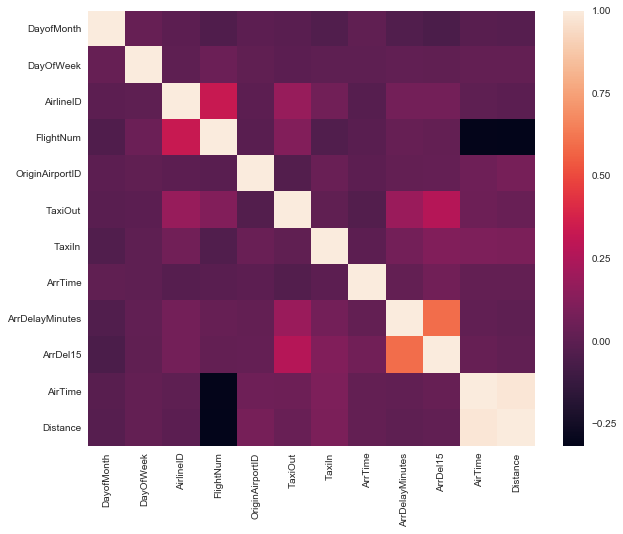

In [260]:
sns.set(style="white")
plt.figure(figsize = (10, 8))
corr = df_clean_for_delay1.corr()
sns.heatmap(corr,  xticklabels=corr.columns, yticklabels=corr.columns)
print(corr)

In [261]:
df_clean_for_delay1.drop(["AirTime"], axis = 1, inplace = True)


In [262]:
df_clean_for_delay1.drop(["ArrDel15"], axis = 1, inplace = True)

df_clean_for_delay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433298 entries, 0 to 445826
Data columns (total 10 columns):
DayofMonth         433298 non-null int64
DayOfWeek          433298 non-null int64
AirlineID          433298 non-null int64
FlightNum          433298 non-null int64
OriginAirportID    433298 non-null int64
TaxiOut            433298 non-null float64
TaxiIn             433298 non-null float64
ArrTime            433298 non-null float64
ArrDelayMinutes    433298 non-null float64
Distance           433298 non-null float64
dtypes: float64(5), int64(5)
memory usage: 56.4 MB


In [263]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [264]:

features = []
for i in df_clean_for_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X=df_clean_for_delay1[features]
y=df_clean_for_delay1['ArrDelayMinutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,4.1,DayofMonth
1,5.2,DayOfWeek
2,92.6,AirlineID
3,2.8,FlightNum
4,68.8,OriginAirportID
5,4.4,TaxiOut
6,2.8,TaxiIn
7,9.2,ArrTime
8,3.3,Distance


In [265]:
df_clean_for_delay1.drop(["AirlineID"], axis = 1, inplace = True)

features = []
for i in df_clean_for_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X=df_clean_for_delay1[features]
y=df_clean_for_delay1['ArrDelayMinutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,4.0,DayofMonth
1,5.0,DayOfWeek
2,2.7,FlightNum
3,19.1,OriginAirportID
4,4.1,TaxiOut
5,2.8,TaxiIn
6,8.4,ArrTime
7,3.3,Distance


In [266]:
df_clean_for_delay1.drop(["OriginAirportID"], axis = 1, inplace = True)

features = []
for i in df_clean_for_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X=df_clean_for_delay1[features]
y=df_clean_for_delay1['ArrDelayMinutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.6,DayofMonth
1,4.5,DayOfWeek
2,2.5,FlightNum
3,3.8,TaxiOut
4,2.6,TaxiIn
5,6.2,ArrTime
6,3.0,Distance


In [267]:
df_clean_for_delay1.drop(["ArrTime"], axis = 1, inplace = True)

features = []
for i in df_clean_for_delay1.columns:
    if i != "ArrDelayMinutes":
        features.append(i)
        
X=df_clean_for_delay1[features]
y=df_clean_for_delay1['ArrDelayMinutes']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.3,DayofMonth
1,4.1,DayOfWeek
2,2.4,FlightNum
3,3.7,TaxiOut
4,2.6,TaxiIn
5,2.8,Distance


In [268]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ArrDelayMinutes   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     8581.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:58:04   Log-Likelihood:            -1.8218e+06
No. Observations:              368303   AIC:                         3.644e+06
Df Residuals:                  368297   BIC:                         3.644e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DayofMonth    -0.1779      0.006    -31.790      0.000      -0.189      -0.167
DayOfWeek      0.1053      0.025      4.218      0.000       0.056       0.154
FlightNum  -9.503e-05   3.18e-05     -2.984      0.003      -0.000   -3.26e-05
TaxiOut        0.6810      0.006    118.745      0.000       0.670       0.692
TaxiIn         0.4088      0.010     41.328      0.000       0.389       0.428
Distance      -0.0010   9.02e-05    -11.318      0.000      -0.001      -0.001
==============================================================================
Omnibus:                   602502.076   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        828318695.314
Skew:                          10.699   Prob(JB):                         0.00
Kurtosis:                     234.341   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
#print(predictions)[0:5]
lm.score(X,y)


0.043387024964923193